In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import matplotlib.colors
import plotly.express as px
import plotly.graph_objects as go
import phik
from sklearn.metrics import roc_auc_score

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_excel('/Users/izzy/Downloads/Telegram Desktop/Data for Test.xlsx', sheet_name='Raw Data')

In [3]:
df.rename(columns={'Default  (1- yes,0-no)': 'default'}, inplace=True)

In [4]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262784 entries, 0 to 262783
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   idscore         262784 non-null  int64         
 1   variable_       262784 non-null  object        
 2   varvalue        262784 non-null  float64       
 3   idscore.1       262784 non-null  int64         
 4   scoredate       262784 non-null  datetime64[ns]
 5   client_id       262784 non-null  int64         
 6   application_id  262784 non-null  int64         
 7   agreement_id    262784 non-null  int64         
 8   stard_day       262784 non-null  datetime64[ns]
 9   matured         262784 non-null  int64         
 10  default         262784 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(7), object(1)
memory usage: 22.1+ MB
None


In [5]:
df.columns

Index(['idscore', 'variable_', 'varvalue', 'idscore.1', 'scoredate',
       'client_id', 'application_id', 'agreement_id', 'stard_day', 'matured',
       'default'],
      dtype='object')

### 1 Make analysis of default: column  Default  (1- yes,0-no), and need to select matured=1 

In [6]:
first_task = df.query('matured == 1')
first_task = first_task.drop_duplicates(keep='first').reset_index(drop=True)

In [7]:
ids = ['client_id','idscore','application_id', 'idscore.1', 'agreement_id']
for i in ids:
    print(f'{i} count: {first_task[i].nunique()}')

client_id count: 5638
idscore count: 5638
application_id count: 5638
idscore.1 count: 5638
agreement_id count: 5638


In [8]:
first_task.drop(ids[1:], axis=1, inplace=True)

In [9]:
default_by_clients = first_task.groupby('client_id')['default'].sum().apply(lambda x : 1 if x > 0 else 0)

In [10]:
pivot_by_variable = pd.pivot_table(first_task, index = ['client_id'],columns = ['variable_'], values = ['varvalue'])
pivot_by_variable.columns = pivot_by_variable.columns.droplevel(0)

In [11]:
pivot_first_task = pd.merge(default_by_clients, pivot_by_variable, on = 'client_id')

In [12]:
display(pivot_first_task.head())
print('===============================================================')
print(pivot_first_task.info())
print('===============================================================')
print(pivot_first_task.describe())

,default,Cut Off,Limit Approved,Score Final,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V3,V4,V5,V6,V7,V8,V9
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230267,0,0.48,450.0,0.411461,57534.0,NaN,38.0,NaN,31228.0,38.0,52.0,74.0,7.0,3.0,1.0,47.88,1.0,8.0,0.0,1.0,2921.0,0.0,0.0,0.0,0.0,0.0,10.0,-0.012087
232333,1,0.48,800.0,0.369215,6576.0,NaN,14.0,NaN,13100.0,12.0,8.0,17.0,3.0,2.0,5.0,41.04,5.0,6.0,6.0,6.0,6314.0,4.0,0.0,4.0,6.0,5.0,8.0,-0.012087
240529,0,0.48,300.0,0.458561,3000.0,NaN,9.0,NaN,14608.0,9.0,14.0,41.0,1.0,0.0,0.0,32.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-0.012087
240869,1,0.40,800.0,0.369416,7202.0,NaN,8.0,NaN,18357.0,7.0,5.0,8.0,3.0,3.0,1.0,29.05,2.0,3.0,3.0,3.0,18357.0,1.0,0.0,2.0,3.0,2.0,5.0,-0.012087
241148,0,0.40,1000.0,0.310454,3000.0,NaN,10.0,NaN,0.0,8.0,4.0,7.0,1.0,1.0,3.0,56.57,4.0,5.0,4.0,4.0,375.0,4.0,0.0,4.0,4.0,4.0,5.0,-0.012087


<class 'pandas.core.frame.DataFrame'>
Index: 5638 entries, 230267 to 366588
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   default          5638 non-null   int64  
 1   Cut Off          5638 non-null   float64
 2   Limit Approved   5638 non-null   float64
 3   Score Final      5638 non-null   float64
 4   V1               5638 non-null   float64
 5   V10              1587 non-null   float64
 6   V11              5638 non-null   float64
 7   V12              45 non-null     float64
 8   V13              5638 non-null   float64
 9   V14              5638 non-null   float64
 10  V15              5638 non-null   float64
 11  V16              5638 non-null   float64
 12  V17              5638 non-null   float64
 13  V18              5638 non-null   float64
 14  V19              5638 non-null   float64
 15  V2               5638 non-null   float64
 16  V20              5638 non-null   float64
 17  V21         

In [13]:
pal, color = ['#016CC9', '#DEB078'], ['#8DBAE2', '#EDD3B3']
fig = go.Figure()
fig.add_trace(go.Pie(labels=pivot_first_task['default'], hole=.45, 
                     showlegend=True, sort=False, 
                     marker=dict(colors=color, line=dict(color=pal, width=2.5)),
                     textinfo='percent'
                     ))

fig.update_layout(title='Target Distribution', 
                  legend=dict(traceorder='reversed', y=1.05, x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide', width=700)

fig.show()

- **34% of our clients are in debt**

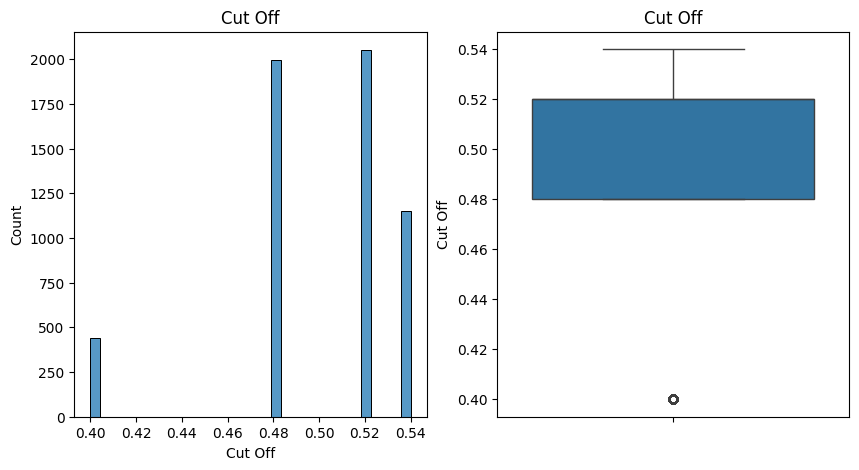

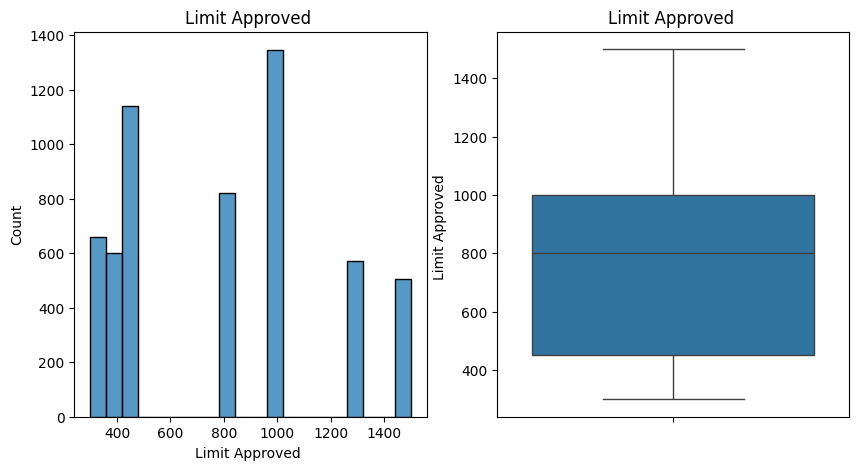

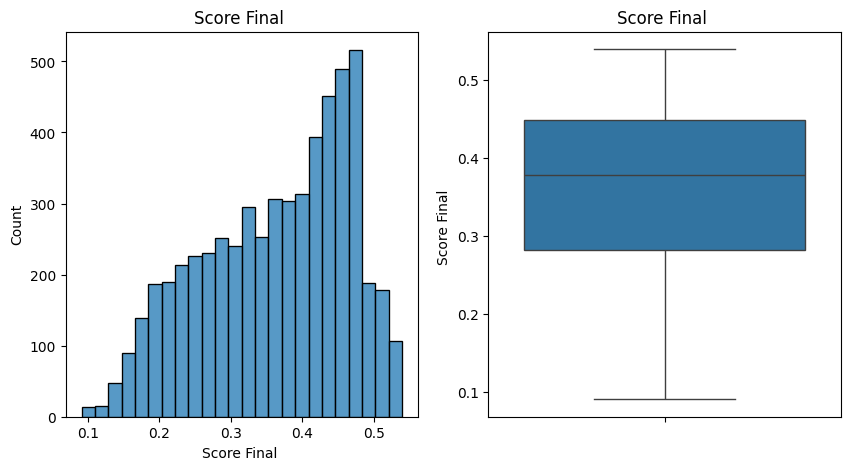

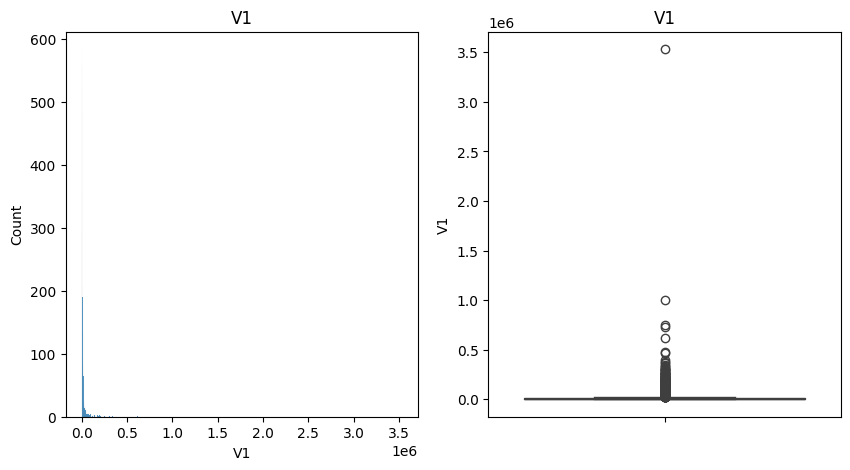

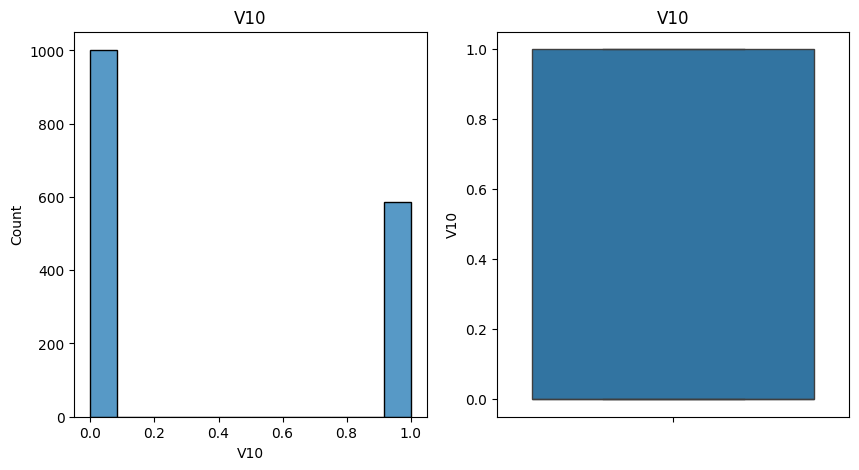

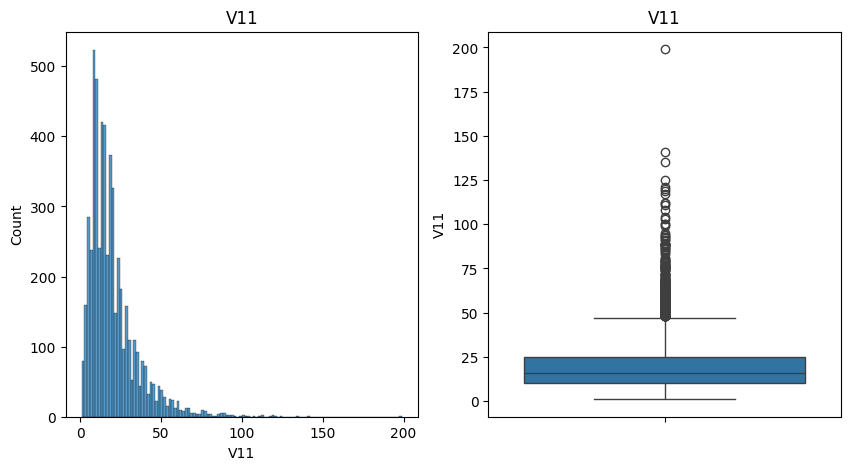

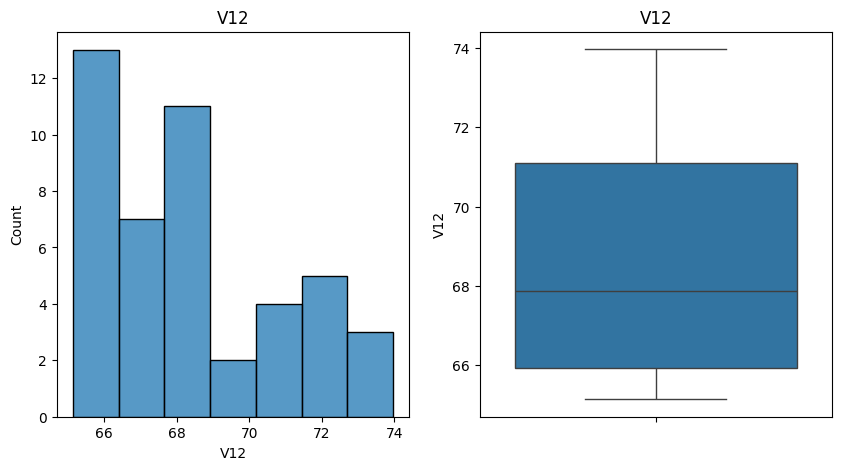

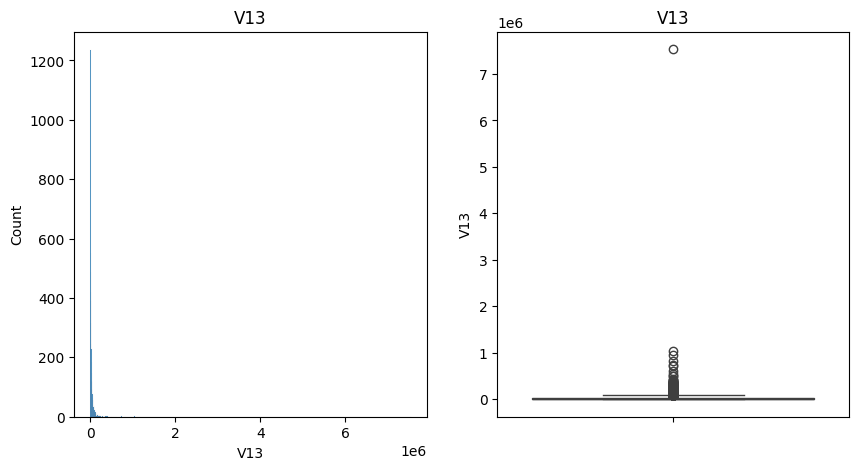

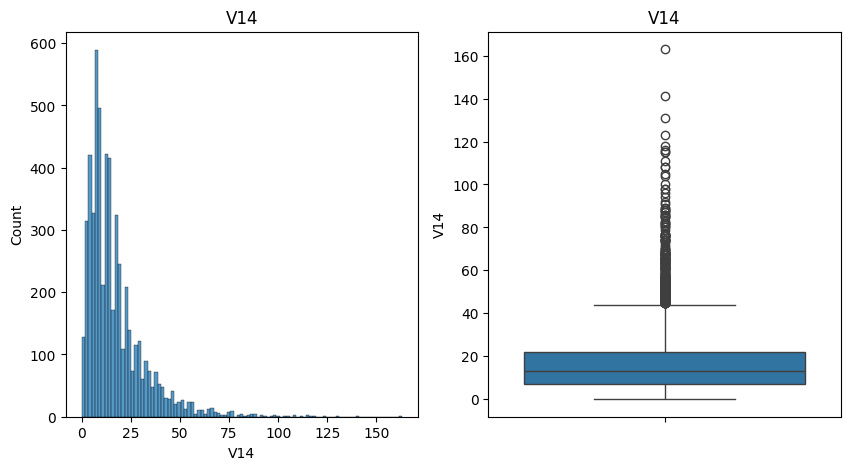

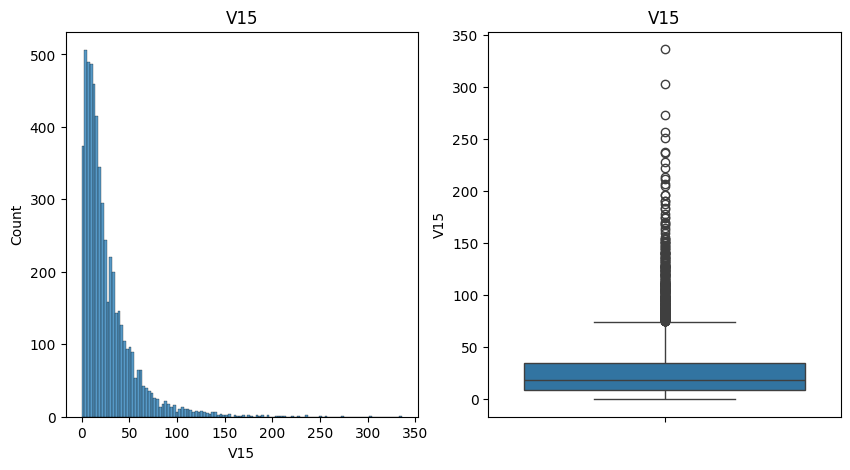

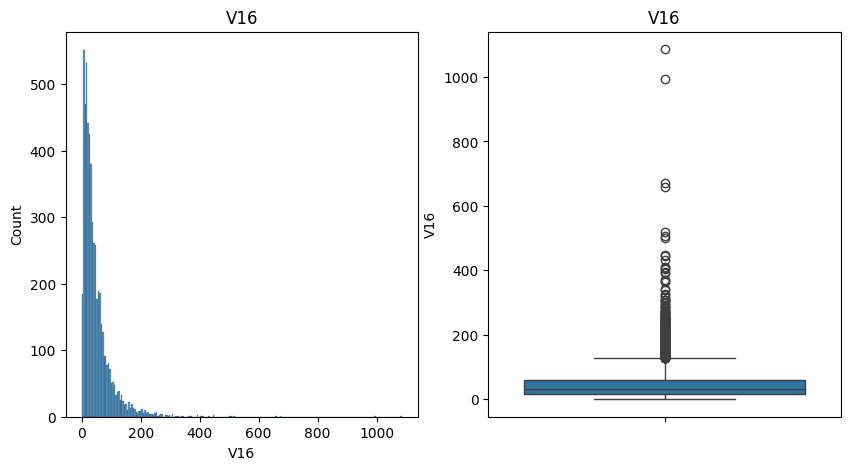

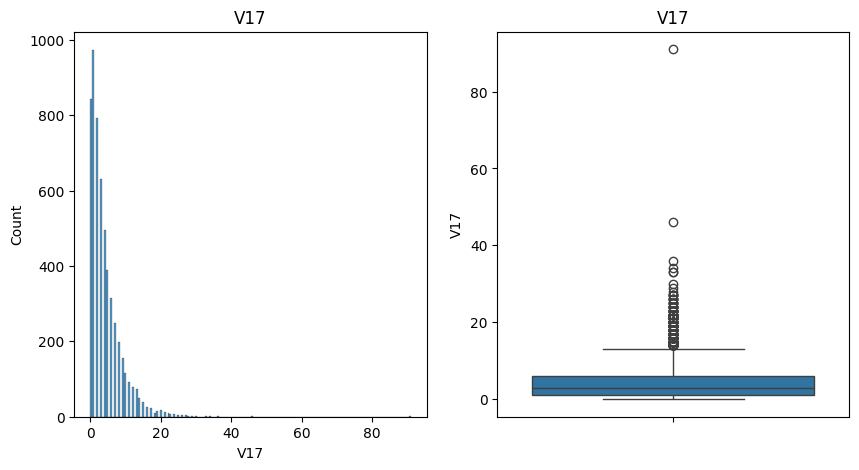

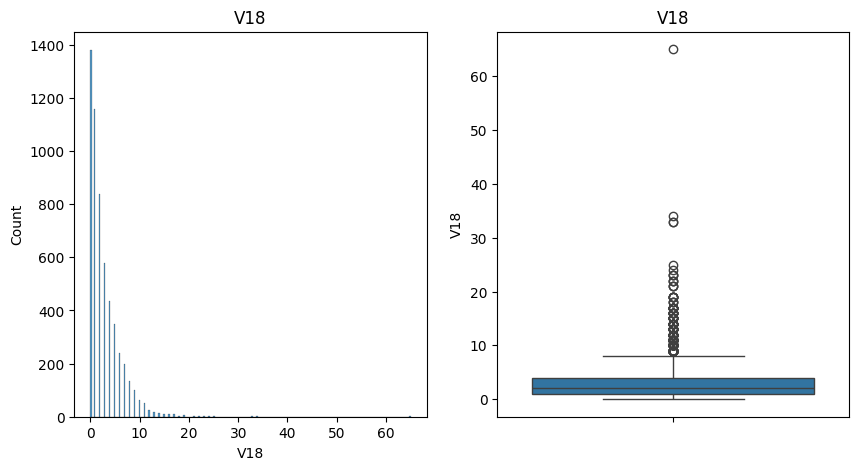

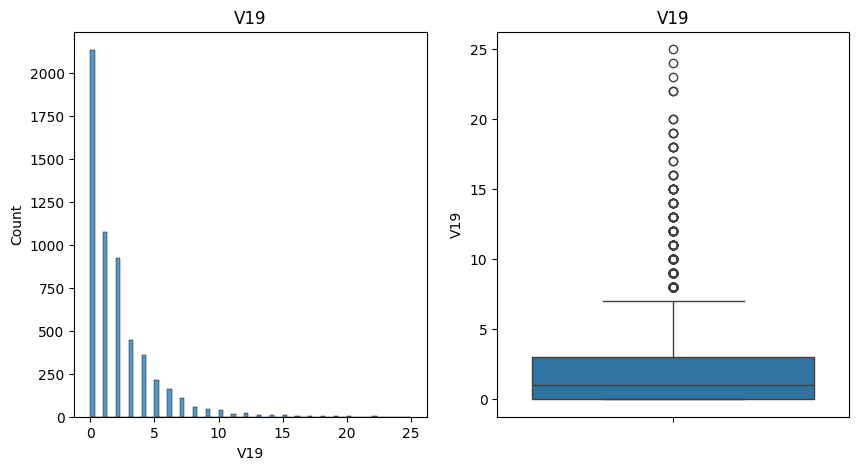

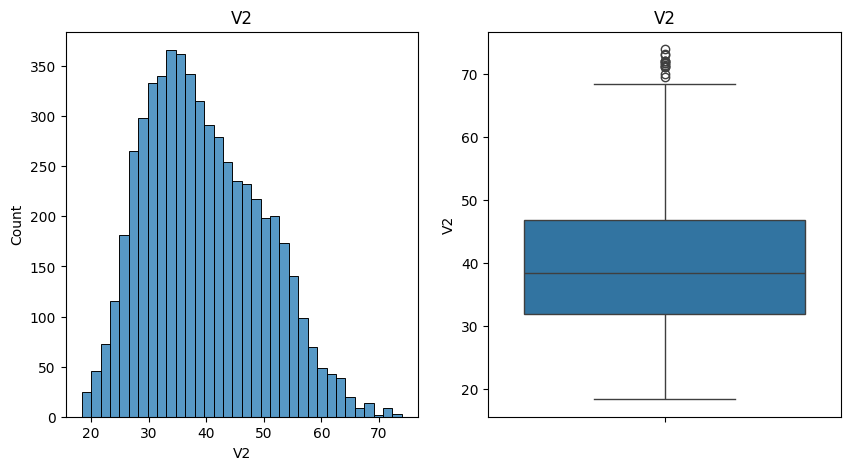

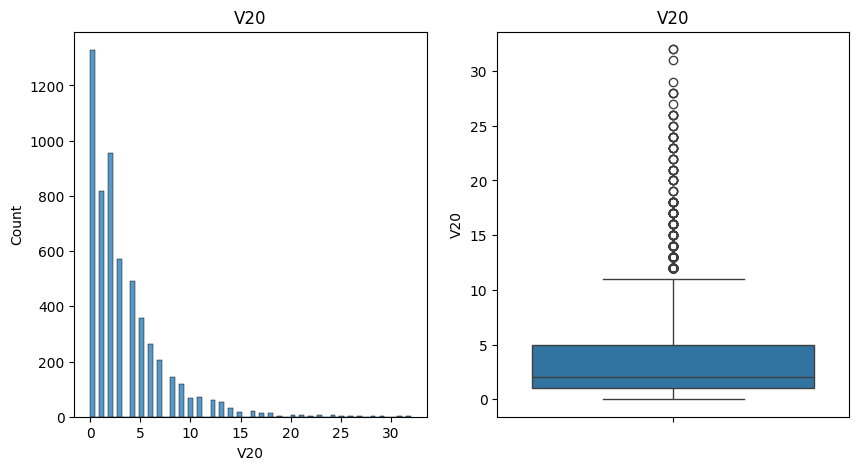

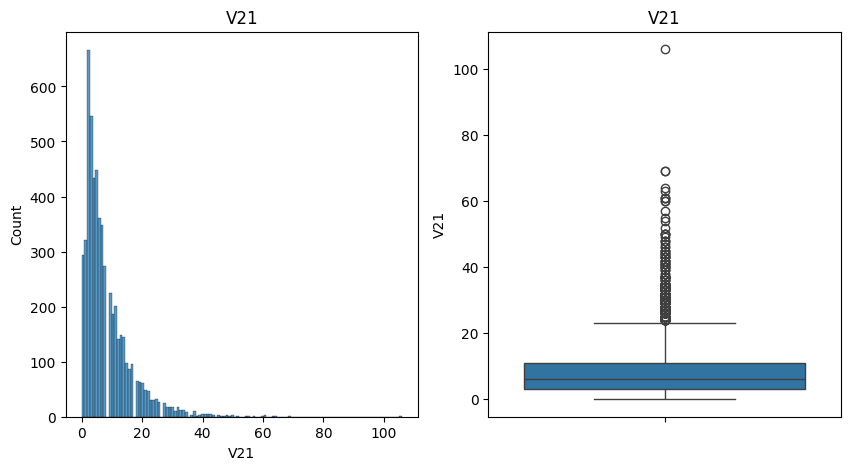

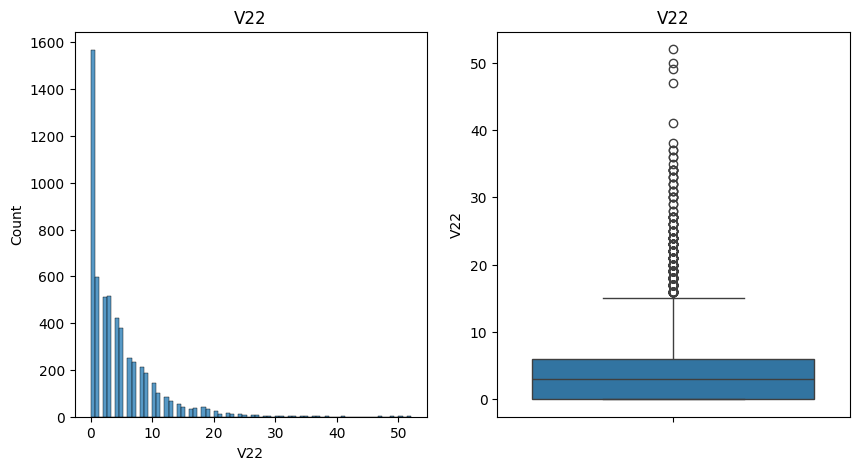

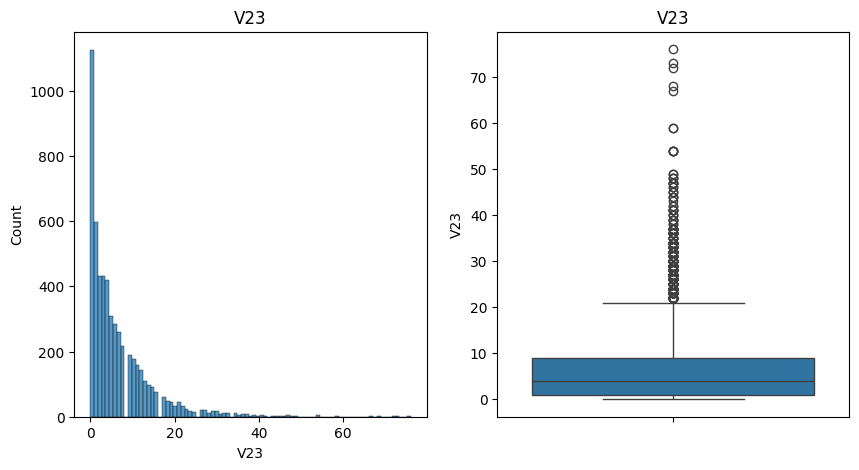

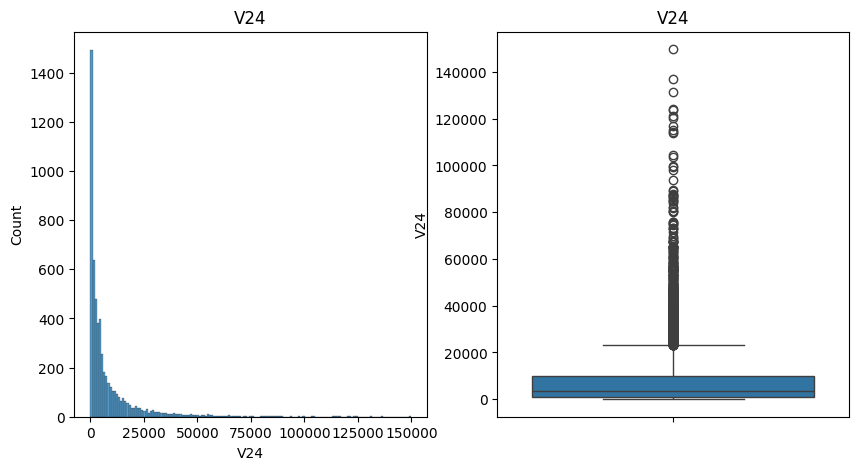

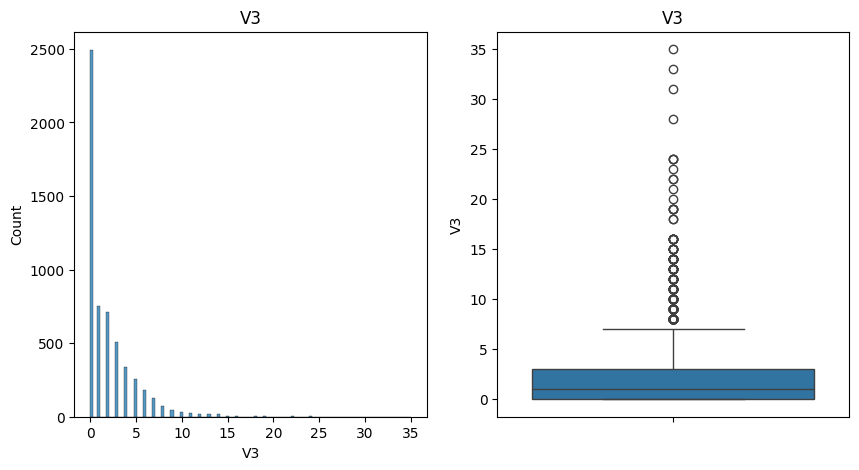

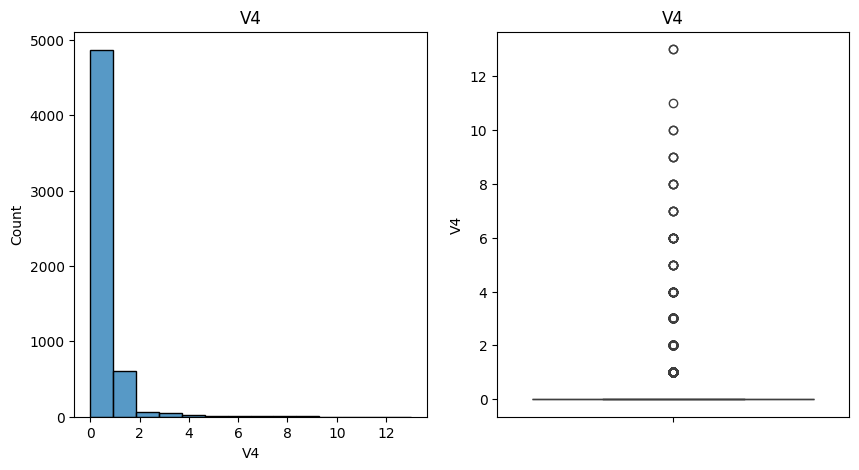

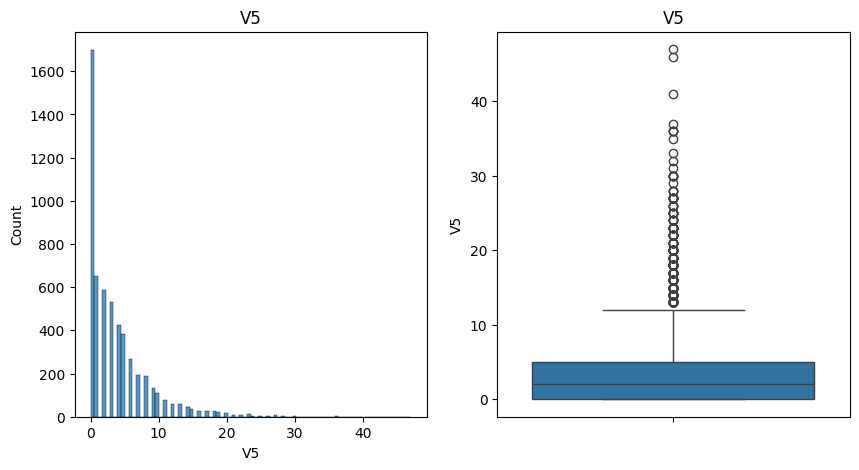

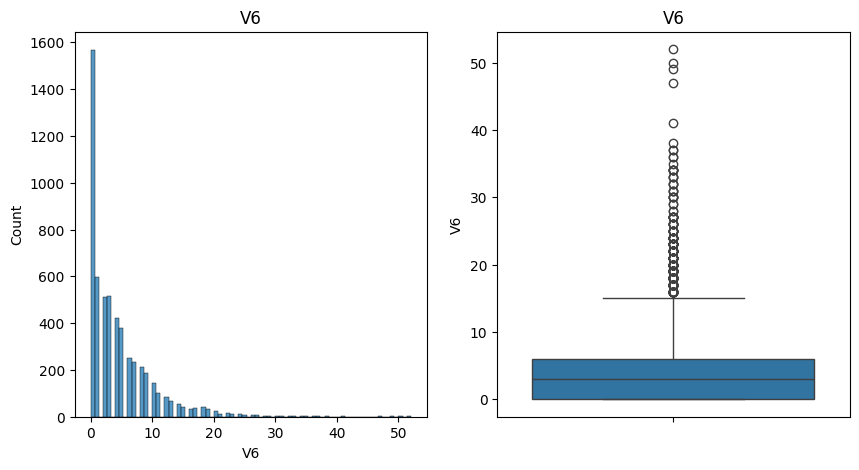

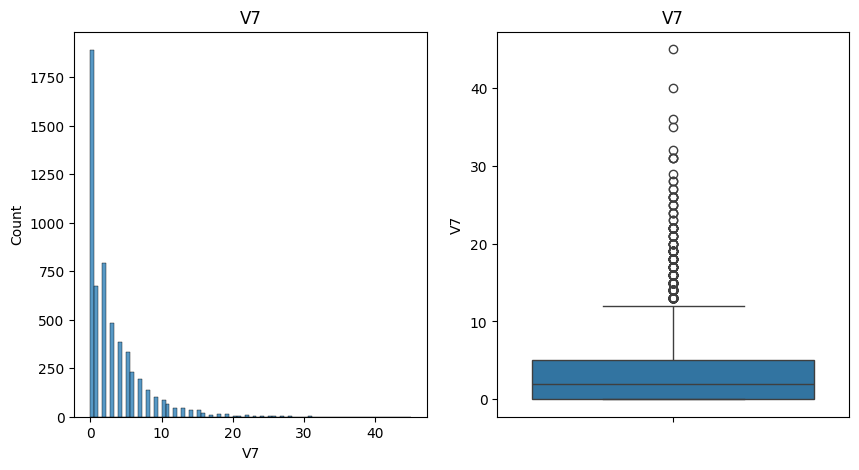

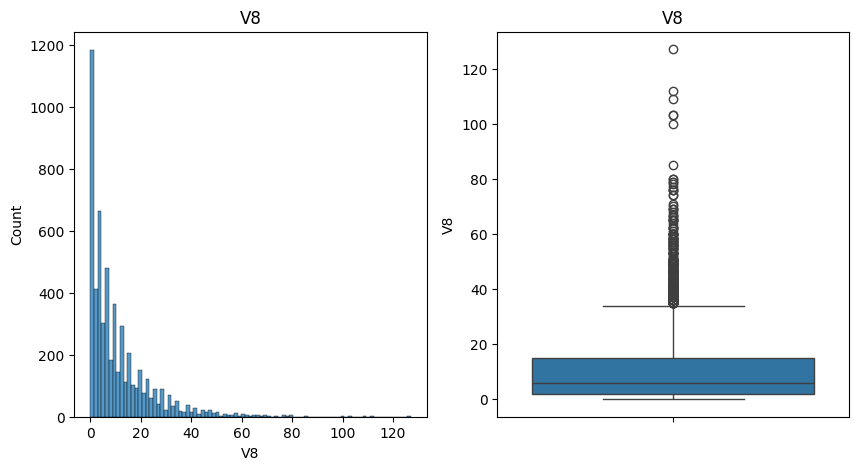

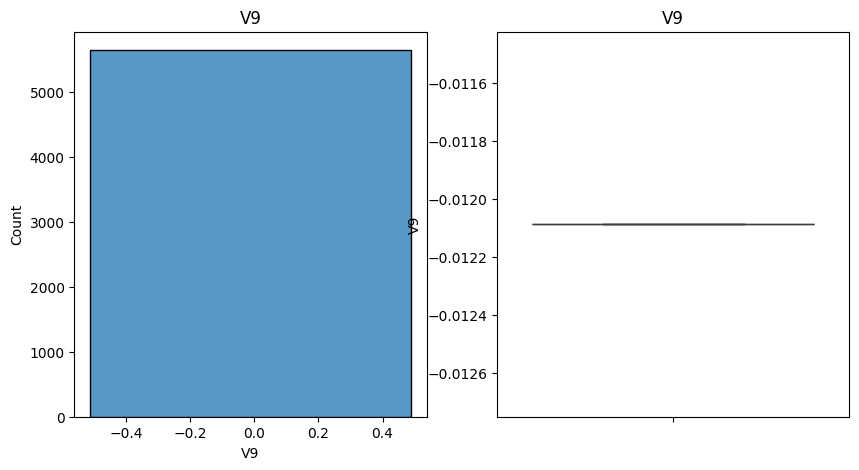

In [14]:
# let's see distribution of variables

for i in range(1, len(pivot_first_task.columns)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    sns.histplot(data = pivot_first_task.iloc[:,i], ax=ax1)
    ax1.title.set_text(pivot_first_task.columns[i])
    sns.boxplot(data = pivot_first_task.iloc[:,i], ax=ax2)
    ax2.title.set_text(pivot_first_task.columns[i])
    plt.show()

- Most distributions are exponential with the largest number of observations closer to 0

- There are many anomalies in the data that need to be addressed.

- V9 is constant we can just remove it

- **Since there is not a lot of data, let's remove only those anomalies that affect the statistics too much (V1,V13)**

In [15]:
pivot_first_task.drop('V9', axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



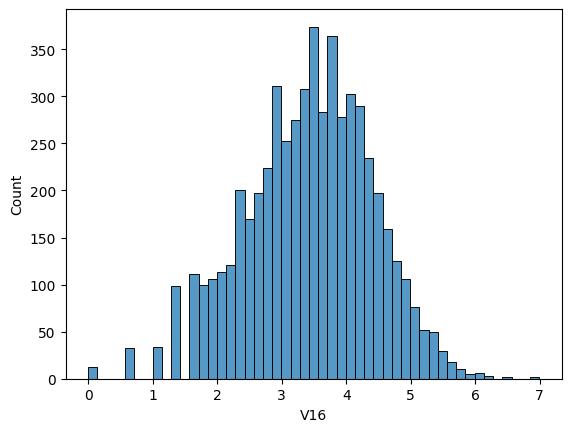

In [16]:
sns.histplot(data = np.log(pivot_first_task['V16']));

**It can also be noted that the exponential distribution can be reduced to normal, but then it will be more difficult to interpret**

In [17]:
pivot_first_task = pivot_first_task[pivot_first_task['V1'] <= np.percentile(pivot_first_task['V1'], 95)] 
pivot_first_task = pivot_first_task[pivot_first_task['V13'] <= np.percentile(pivot_first_task['V13'], 95)]

- clear anomaly and check target

In [18]:
pal, color = ['#016CC9', '#DEB078'], ['#8DBAE2', '#EDD3B3']
fig = go.Figure()
fig.add_trace(go.Pie(labels=pivot_first_task['default'], hole=.45, 
                     showlegend=True, sort=False, 
                     marker=dict(colors=color, line=dict(color=pal, width=2.5)),
                     textinfo='percent'
                     ))

fig.update_layout(title='Target Distribution', 
                  legend=dict(traceorder='reversed', y=1.05, x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide', width=700)

fig.show()

In [19]:
mask_default_1 = pivot_first_task[pivot_first_task['default'] == 1]
mask_default_0 = pivot_first_task[pivot_first_task['default'] == 0]
mask_percent = (mask_default_1.mean()-mask_default_0.mean())/mask_default_0.mean() * 100
red_percent = ['default']

for i in pivot_first_task.columns[1:]:
    print(colored(i, attrs=['bold']))
    if abs(mask_percent[i]) > 20:
        print(colored(f'{round(mask_percent[i], 3)} %', 'red'))
        red_percent.append(i)
    else:
        print(colored(f'{round(mask_percent[i],3)} %', 'green'))
    display(pivot_first_task.groupby('default')[i].describe())

Cut Off
0.114 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,0.50057,0.037603,0.4,0.48,0.52,0.52,0.54
1,1755.0,0.50114,0.037010,0.4,0.48,0.52,0.52,0.54


Limit Approved 
-12.061 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,817.776778,394.841902,300.0,450.0,800.0,1000.0,1500.0
1,1755.0,719.145299,356.893123,300.0,400.0,800.0,1000.0,1500.0


Score Final 
7.724 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,0.354453,0.104610,0.092863,0.268089,0.366618,0.444499,0.539531
1,1755.0,0.381832,0.093635,0.109822,0.317998,0.399194,0.457620,0.539526


V1
-15.707 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,8563.849385,8713.587372,0.0,3000.0,5648.0,11121.0,51883.0
1,1755.0,7218.758405,8419.295549,0.0,2080.0,4200.0,8701.0,52038.0


V10
16.095 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,919.0,0.347116,0.476312,0.0,0.0,0.0,1.0,1.0
1,536.0,0.402985,0.490956,0.0,0.0,0.0,1.0,1.0


V11
-14.782 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,20.423642,15.106105,1.0,10.0,17.0,26.0,199.0
1,1755.0,17.404558,12.698386,1.0,9.0,14.0,22.0,120.0


V12
-1.349 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,25.0,68.7984,2.749465,65.33,66.650,68.10,71.420,73.97
1,8.0,67.8700,1.814214,65.84,67.085,67.84,68.035,71.78


V13
-17.144 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,21418.742574,21845.905079,0.0,4824.0,14356.0,30730.0,98404.0
1,1755.0,17746.737322,20060.752553,0.0,2551.0,11134.0,25027.0,96302.0


V14
-17.594 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,17.412841,14.729839,0.0,8.0,13.0,23.0,163.0
1,1755.0,14.349288,12.308438,0.0,6.0,11.0,18.5,115.0


V15
-22.942 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,27.060006,28.210706,0.0,9.0,18.0,35.0,336.0
1,1755.0,20.851852,21.106094,0.0,6.0,15.0,28.0,178.0


V16
-20.22 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,48.752775,54.287269,0.0,17.0,33.0,63.0,1086.0
1,1755.0,38.895157,44.695822,0.0,14.0,27.0,49.0,994.0


V17
-16.794 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,4.347135,4.288282,0.0,1.0,3.0,6.0,34.0
1,1755.0,3.617094,4.848367,0.0,1.0,2.0,5.0,91.0


V18
-16.735 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,2.963096,3.154508,0.0,1.0,2.0,4.0,34.0
1,1755.0,2.467236,3.506865,0.0,0.0,1.0,3.0,65.0


V19
-22.492 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,2.076808,2.697445,0.0,0.0,1.0,3.0,25.0
1,1755.0,1.609687,2.322813,0.0,0.0,1.0,2.0,23.0


V2
-4.443 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,39.839730,10.126064,18.55,32.150,38.76,47.12,73.97
1,1755.0,38.069675,9.821865,18.36,30.385,36.50,45.20,71.78


V20
-20.118 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,3.567957,3.968281,0.0,1.0,2.0,5.0,32.0
1,1755.0,2.850142,3.442109,0.0,0.0,2.0,4.0,29.0


V21
-19.787 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,8.733873,8.045507,0.0,3.0,6.0,12.0,69.0
1,1755.0,7.005698,7.751189,0.0,2.0,5.0,9.0,106.0


V22
-17.01 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,4.727873,5.453123,0.0,1.0,3.0,7.0,52.0
1,1755.0,3.923647,5.308164,0.0,0.0,2.0,6.0,50.0


V23
-19.125 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,7.026403,7.911570,0.0,1.0,5.0,10.0,73.0
1,1755.0,5.682621,7.664435,0.0,0.0,3.0,8.0,76.0


V24
-32.143 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,8823.930093,13137.657451,0.0,1065.0,4016.0,11108.0,149687.0
1,1755.0,5987.690598,10170.771420,0.0,450.0,2612.0,6575.5,121154.0


V3
-18.642 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,2.189319,3.022303,0.0,0.0,1.0,3.0,35.0
1,1755.0,1.781197,2.791498,0.0,0.0,1.0,3.0,28.0


V4
-19.053 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,0.219622,0.801266,0.0,0.0,0.0,0.0,13.0
1,1755.0,0.177778,0.671344,0.0,0.0,0.0,0.0,10.0


V5
-13.957 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,3.991899,4.872836,0.0,0.0,3.0,6.0,47.0
1,1755.0,3.434758,4.630059,0.0,0.0,2.0,5.0,31.0


V6
-17.01 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,4.727873,5.453123,0.0,1.0,3.0,7.0,52.0
1,1755.0,3.923647,5.308164,0.0,0.0,2.0,6.0,50.0


V7
-26.906 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,3.440144,4.371182,0.0,0.0,2.0,5.0,45.0
1,1755.0,2.514530,3.512348,0.0,0.0,1.0,4.0,32.0


V8
-23.608 %


,count,mean,std,min,25%,50%,75%,max
default,,,,,,,,
0,3333.0,11.684368,12.578182,0.0,3.0,8.0,17.0,112.0
1,1755.0,8.925926,12.052157,0.0,1.0,4.0,12.0,127.0


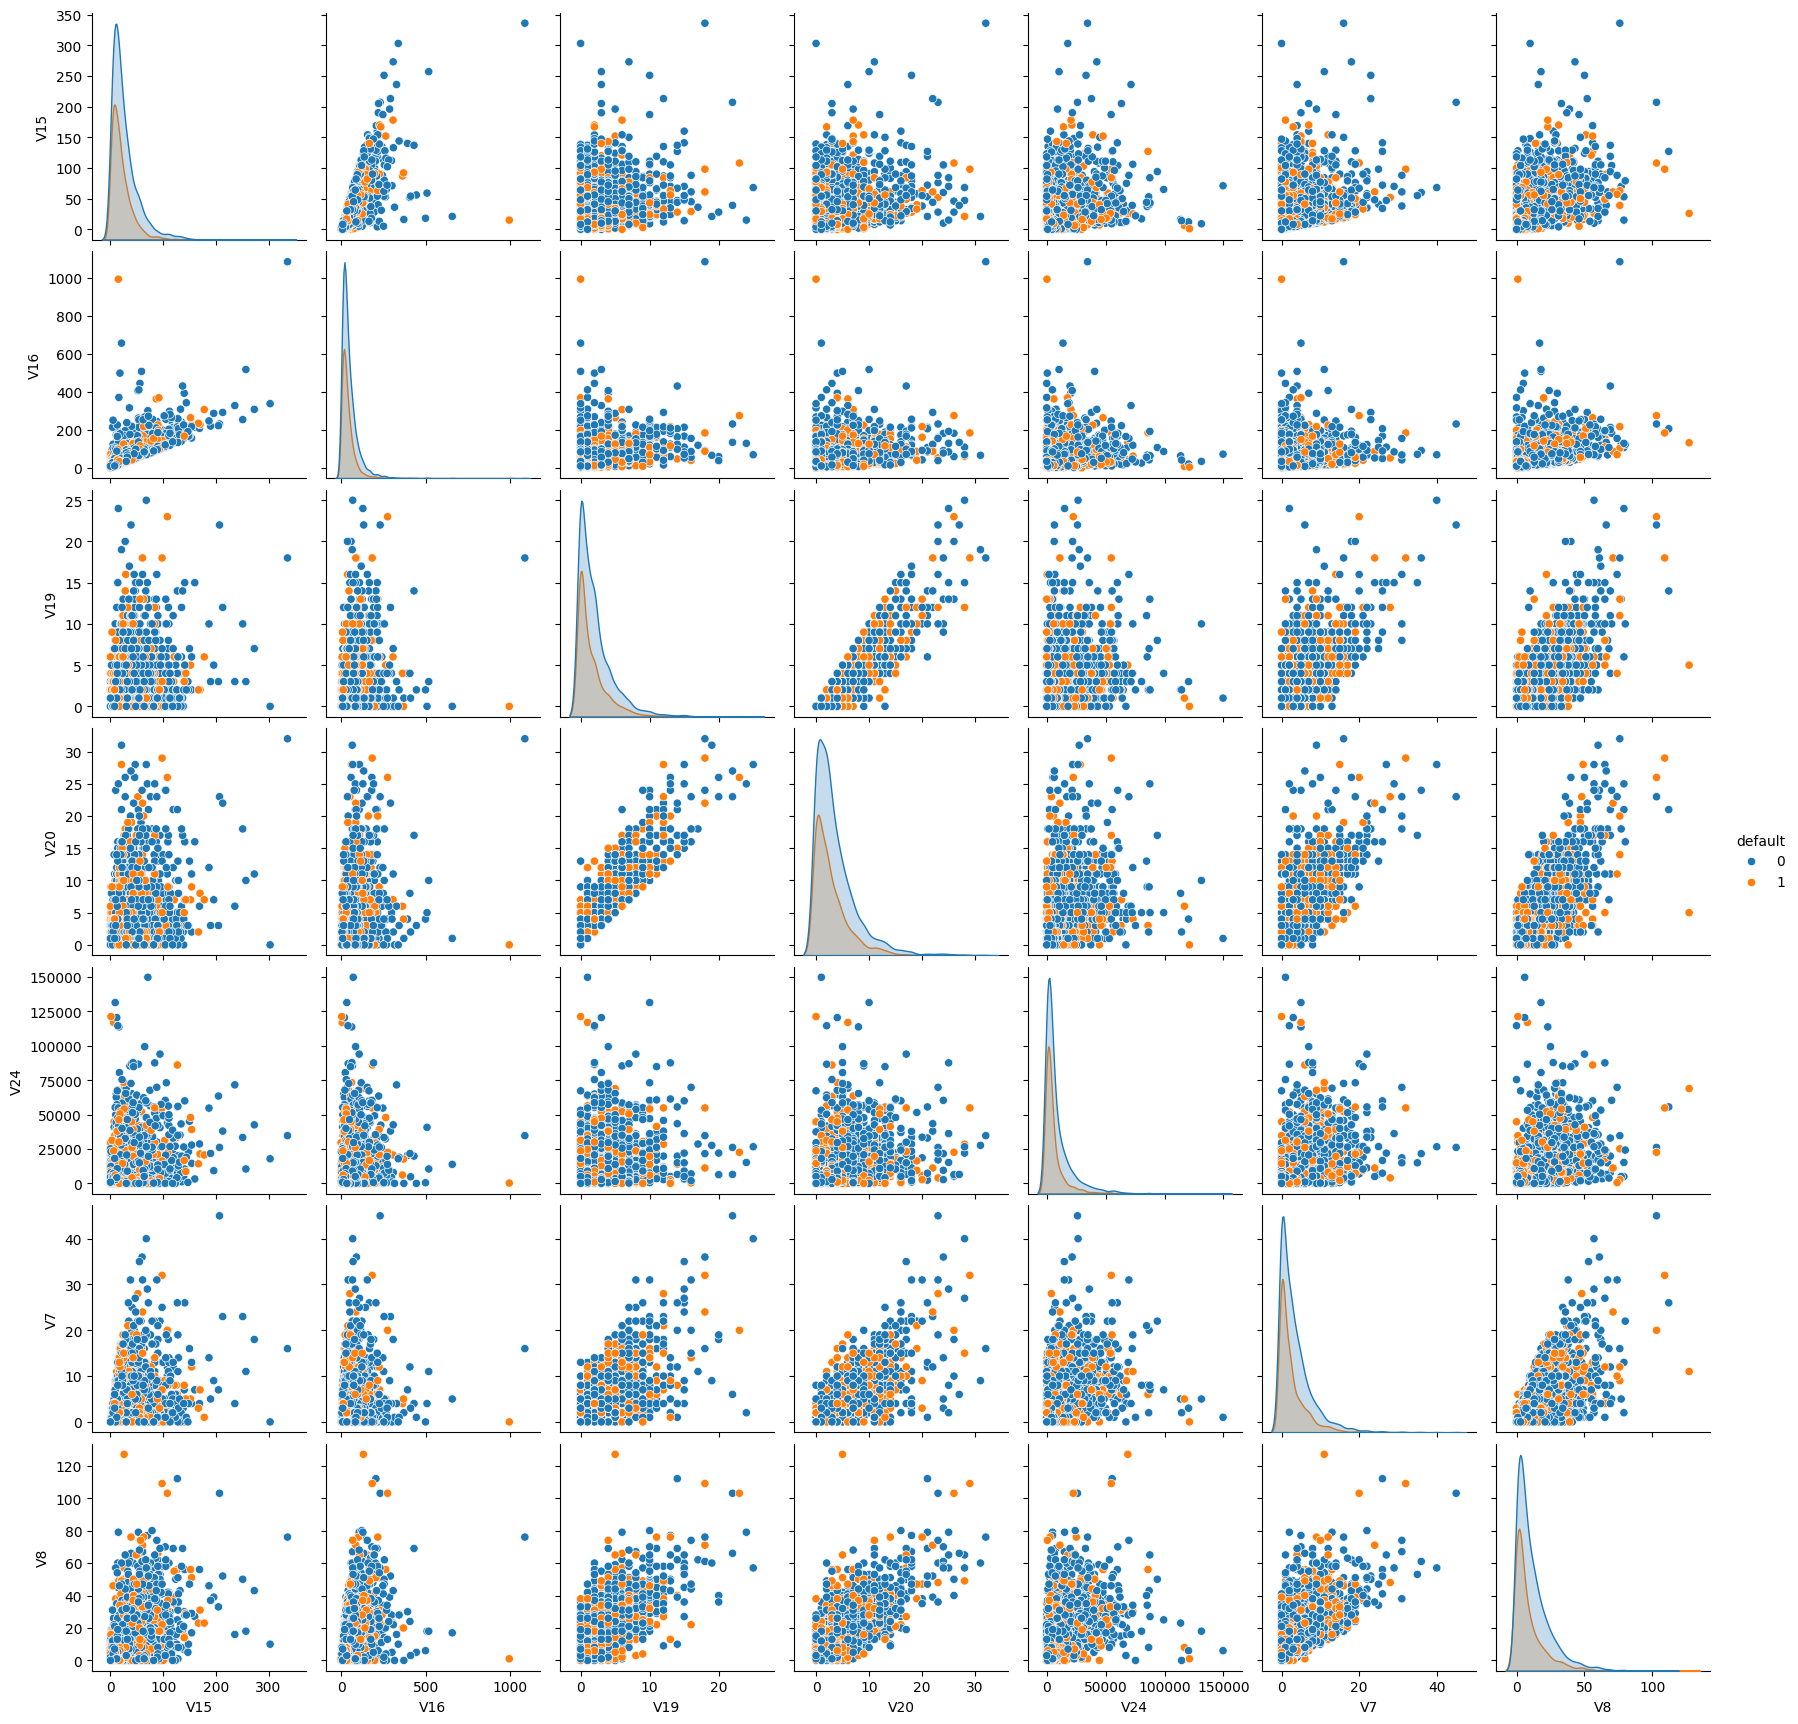

In [20]:
sns.pairplot(pivot_first_task[red_percent], hue = 'default');
plt.show()

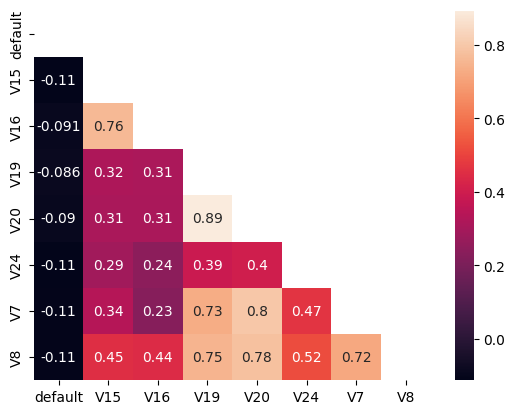

In [21]:
corr = pivot_first_task[red_percent].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
corr = corr.mask(mask)

sns.heatmap(corr, annot=True)
plt.show()

In [22]:

corr=pivot_first_task.corr()
corr=corr['default'].sort_values(ascending=False)[1:-1]
pal=sns.color_palette("Reds_r",135).as_hex()
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig = go.Figure()
fig.add_trace(go.Bar(x=corr[corr>=0], y=corr[corr>=0].index, 
                     marker_color=rgb, orientation='h', 
                     marker_line=dict(color=pal,width=2), name='',
                     hovertemplate='%{y} correlation with target: %{x:.3f}',
                     showlegend=False))
pal=sns.color_palette("Blues",100).as_hex()
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig.add_trace(go.Bar(x=corr[corr<0], y=corr[corr<0].index, 
                     marker_color=rgb[25:], orientation='h', 
                     marker_line=dict(color=pal[25:],width=2), name='',
                     hovertemplate='%{y} correlation with target: %{x:.3f}',
                     showlegend=False))
fig.update_layout(title="Feature Correlations with Target",
                  xaxis_title="Correlation", margin=dict(l=150),
                  height=700, width=700, hovermode='closest')
fig.show()

In [23]:
pivot_first_task.phik_matrix().iloc[:,0]

interval columns not set, guessing: ['default', 'Cut Off', 'Limit Approved ', 'Score Final ', 'V1', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8']


default            1.000000
Cut Off            0.036515
Limit Approved     0.190141
Score Final        0.174770
V1                 0.141105
V10                0.074853
V11                0.076017
V12                0.000000
V13                0.095530
V14                0.113884
V15                0.129925
V16                0.064263
V17                0.059505
V18                0.041592
V19                0.077780
V2                 0.098019
V20                0.086309
V21                0.127233
V22                0.040465
V23                0.097778
V24                0.130580
V3                 0.044397
V4                 0.033649
V5                 0.039777
V6                 0.040465
V7                 0.105330
V8                 0.106997
Name: default, dtype: float64

In [24]:
pivot_first_task.columns

Index(['default', 'Cut Off', 'Limit Approved ', 'Score Final ', 'V1', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V2',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8'],
      dtype='object')

### Summary #1 task
- ratio of defaulted and solvent clients default = 66%, paid = 34%
- we have anomalies in the data, and most features are exponentially distributed
- statistics between the 1 and 0 classes are significantly different
- at first glance it is difficult to significantly improve the quality by some kind of linear separability
- there is no strong Pearson or Phik correlation between target and features

### 2) Make analysis of performance of current scoring over the time plus in general (GINI etc)

In [25]:
df = df.drop_duplicates()
df.head()

,idscore,variable_,varvalue,idscore.1,scoredate,client_id,application_id,agreement_id,stard_day,matured,default
0,96743,Cut Off,0.400000,96743,2023-10-04 13:26:46.613,287913,297361,3000297361,2023-10-05,1,0
2,96743,Limit Approved,1000.000000,96743,2023-10-04 13:26:46.613,287913,297361,3000297361,2023-10-05,1,0
4,96762,V9,-0.012087,96762,2023-10-04 13:49:22.200,287939,297387,3000297387,2023-10-05,1,0
5,96762,V19,2.000000,96762,2023-10-04 13:49:22.200,287939,297387,3000297387,2023-10-05,1,0
6,96762,V20,5.000000,96762,2023-10-04 13:49:22.200,287939,297387,3000297387,2023-10-05,1,0


In [26]:
pivot_second_task = df.pivot_table(index='client_id', columns='stard_day', values='default', aggfunc='sum', fill_value=0)


In [27]:
for i in pivot_second_task.columns:
    pivot_second_task[i] = pivot_second_task[i].apply(lambda x: 1 if x > 0 else 0)

In [28]:
pivot_by_variable = pd.pivot_table(df, index = ['client_id'],columns = ['variable_'], values = ['varvalue'])
pivot_by_variable.columns = pivot_by_variable.columns.droplevel(0)
pivot_by_variable.head()

variable_,Cut Off,Limit Approved,Score Final,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V3,V4,V5,V6,V7,V8,V9
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
230267,0.48,450.0,0.411461,57534.0,NaN,38.0,NaN,31228.0,38.0,52.0,74.0,7.0,3.0,1.0,47.88,1.0,8.0,0.0,1.0,2921.0,0.0,0.0,0.0,0.0,0.0,10.0,-0.012087
232333,0.48,800.0,0.369215,6576.0,NaN,14.0,NaN,13100.0,12.0,8.0,17.0,3.0,2.0,5.0,41.04,5.0,6.0,6.0,6.0,6314.0,4.0,0.0,4.0,6.0,5.0,8.0,-0.012087
240529,0.48,300.0,0.458561,3000.0,NaN,9.0,NaN,14608.0,9.0,14.0,41.0,1.0,0.0,0.0,32.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-0.012087
240869,0.40,800.0,0.369416,7202.0,NaN,8.0,NaN,18357.0,7.0,5.0,8.0,3.0,3.0,1.0,29.05,2.0,3.0,3.0,3.0,18357.0,1.0,0.0,2.0,3.0,2.0,5.0,-0.012087
241148,0.40,1000.0,0.310454,3000.0,NaN,10.0,NaN,0.0,8.0,4.0,7.0,1.0,1.0,3.0,56.57,4.0,5.0,4.0,4.0,375.0,4.0,0.0,4.0,4.0,4.0,5.0,-0.012087


In [29]:
pivot_second_task.head()


stard_day,2023-09-01,2023-09-02,2023-09-04,2023-09-05,2023-09-06,2023-09-07,2023-09-08,2023-09-09,2023-09-10,2023-09-11,2023-09-21,2023-09-27,2023-09-28,2023-09-29,2023-09-30,2023-10-02,2023-10-03,2023-10-04,2023-10-05,2023-10-06,2023-10-07,2023-10-09,2023-10-10,2023-10-11,2023-10-12,2023-10-13,2023-10-14,2023-10-16,2023-10-17,2023-10-18,2023-10-19,2023-10-20,2023-10-21,2023-10-22,2023-10-23,2023-10-24,2023-10-25,2023-10-26,2023-10-27,2023-10-28,2023-10-29,2023-10-30,2023-10-31,2023-11-01,2023-11-02,2023-11-03,2023-11-04,2023-11-06,2023-11-07,2023-11-08,2023-11-09,2023-11-10,2023-11-11,2023-11-12,2023-11-13,2023-11-14,2023-11-15,2023-11-16,2023-11-17,2023-11-18,2023-11-19
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230267,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
232333,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
240529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
240869,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
241148,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
full_second = pivot_second_task.join(pivot_by_variable.iloc[:,:3])

In [31]:
new = df[['client_id', 'default','stard_day']]

In [32]:
new['stard_day'] = new['stard_day'].astype('object')

/var/folders/2y/v94t8tf55dg1cm0nk0nfzv840000gn/T/ipykernel_29507/812931460.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
new.groupby('client_id')['default'].agg('max')

client_id
230267    0
232333    1
240529    0
240869    1
241148    0
         ..
401124    0
401126    0
401140    0
401146    0
401147    0
Name: default, Length: 9844, dtype: int64

In [34]:
pal, color = ['#016CC9', '#DEB078'], ['#8DBAE2', '#EDD3B3']
fig = go.Figure()
fig.add_trace(go.Pie(labels=new.groupby('client_id')['default'].agg('max'), hole=.45, 
                     showlegend=True, sort=False, 
                     marker=dict(colors=color, line=dict(color=pal, width=2.5)),
                     textinfo='percent'
                     ))

fig.update_layout(title='Target Distribution', 
                  legend=dict(traceorder='reversed', y=1.05, x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide', width=700)

fig.show()

- looks better than matured == 1

In [35]:
new = new.groupby('stard_day')['default'].agg(['count','sum'])
new['paid'] = new['count'] - new['sum']
new.columns = ['count_clients','default','paid']

In [36]:
new.head(20)

,count_clients,default,paid
stard_day,,,
2023-09-01,2300,625,1675
2023-09-02,2900,1050,1850
2023-09-04,3527,1350,2177
2023-09-05,3450,1350,2100
2023-09-06,3527,1251,2276
2023-09-07,3776,1401,2375
2023-09-08,3625,1450,2175
2023-09-09,1325,375,950
2023-09-10,2175,725,1450


In [37]:
new['paid_perc'] = new['paid']/new['count_clients']*100
new['default_perc'] = new['default']/new['count_clients']*100

In [38]:
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig=go.Figure()
fig.add_trace(go.Bar(x=new.index, y=new.paid, name='paid',
                     text=new.paid, texttemplate='%{text:.0f}', 
                     textposition='inside',insidetextanchor="middle",
                     marker=dict(color=color[0],line=dict(color=pal[0],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Paid accounts: %{y}"))
fig.add_trace(go.Bar(x=new.index, y=new.default, name='default',
                     text=new.default, texttemplate='%{text:.0f}', 
                     textposition='inside',insidetextanchor="middle",
                     marker=dict(color=color[1],line=dict(color=pal[1],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Default accounts: %{y}"))
fig.update_layout(title='Distribution of Default by Day', 
                  barmode='relative', width=1400,
                  legend=dict(orientation="h", traceorder="reversed", yanchor="bottom",y=1.1,xanchor="left", x=0))
fig.show()

In [39]:
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig=go.Figure()
fig.add_trace(go.Bar(x=new.index, y=new.paid_perc, name='paid_perc',
                     text=new.paid_perc, texttemplate='%{text:.0f}%', 
                     textposition='inside',insidetextanchor="middle",
                     marker=dict(color=color[0],line=dict(color=pal[0],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Paid accounts: %{y:.2f}%"))
fig.add_trace(go.Bar(x=new.index, y=new.default_perc, name='default_perc',
                     text=new.default_perc, texttemplate='%{text:.0f}%', 
                     textposition='inside',insidetextanchor="middle",
                     marker=dict(color=color[1],line=dict(color=pal[1],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Default accounts: %{y:.2f}%"))
fig.update_layout(title='Distribution of Default percent by Day', 
                  barmode='relative', yaxis_ticksuffix='%', width=1400,
                  legend=dict(orientation="h", traceorder="reversed", yanchor="bottom",y=1.1,xanchor="left", x=0))
fig.show()

In [40]:
pivot_by_variable = pd.pivot_table(df, index = ['client_id'],columns = ['variable_'], values = ['varvalue'])
pivot_by_variable.columns = pivot_by_variable.columns.droplevel(0)

In [41]:
pivot_by_variable

variable_,Cut Off,Limit Approved,Score Final,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V3,V4,V5,V6,V7,V8,V9
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
230267,0.48,450.0,0.411461,57534.0,NaN,38.0,NaN,31228.0,38.0,52.0,74.0,7.0,3.0,1.0,47.88,1.0,8.0,0.0,1.0,2921.0,0.0,0.0,0.0,0.0,0.0,10.0,-0.012087
232333,0.48,800.0,0.369215,6576.0,NaN,14.0,NaN,13100.0,12.0,8.0,17.0,3.0,2.0,5.0,41.04,5.0,6.0,6.0,6.0,6314.0,4.0,0.0,4.0,6.0,5.0,8.0,-0.012087
240529,0.48,300.0,0.458561,3000.0,NaN,9.0,NaN,14608.0,9.0,14.0,41.0,1.0,0.0,0.0,32.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-0.012087
240869,0.40,800.0,0.369416,7202.0,NaN,8.0,NaN,18357.0,7.0,5.0,8.0,3.0,3.0,1.0,29.05,2.0,3.0,3.0,3.0,18357.0,1.0,0.0,2.0,3.0,2.0,5.0,-0.012087
241148,0.40,1000.0,0.310454,3000.0,NaN,10.0,NaN,0.0,8.0,4.0,7.0,1.0,1.0,3.0,56.57,4.0,5.0,4.0,4.0,375.0,4.0,0.0,4.0,4.0,4.0,5.0,-0.012087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401124,0.40,800.0,0.361549,2927.0,0.0,7.0,NaN,4417.0,6.0,8.0,11.0,3.0,3.0,0.0,54.98,2.0,3.0,3.0,3.0,4441.0,1.0,0.0,3.0,3.0,1.0,5.0,-0.012087
401126,0.52,1000.0,0.343908,8783.0,1.0,44.0,NaN,23132.0,38.0,21.0,34.0,13.0,11.0,10.0,32.31,18.0,38.0,19.0,29.0,29649.0,3.0,2.0,11.0,19.0,12.0,38.0,-0.012087
401140,0.52,800.0,0.400095,3659.0,1.0,7.0,NaN,7455.0,7.0,3.0,8.0,3.0,3.0,0.0,38.53,1.0,3.0,4.0,6.0,7607.0,1.0,0.0,2.0,4.0,1.0,6.0,-0.012087


In [42]:
default_second = df.groupby(['client_id'])[['default','stard_day']].max()
default_second

,default,stard_day
client_id,,
230267,0,2023-09-04
232333,1,2023-09-06
240529,0,2023-09-04
240869,1,2023-09-01
241148,0,2023-09-01
...,...,...
401124,0,2023-11-19
401126,0,2023-11-19
401140,0,2023-11-19


In [43]:
limit_second = pivot_by_variable['Limit Approved ']
limit_second

client_id
230267     450.0
232333     800.0
240529     300.0
240869     800.0
241148    1000.0
           ...  
401124     800.0
401126    1000.0
401140     800.0
401146     450.0
401147    1000.0
Name: Limit Approved , Length: 9844, dtype: float64

In [44]:
second_full = default_second.join(limit_second)

In [45]:
second_full

,default,stard_day,Limit Approved
client_id,,,
230267,0,2023-09-04,450.0
232333,1,2023-09-06,800.0
240529,0,2023-09-04,300.0
240869,1,2023-09-01,800.0
241148,0,2023-09-01,1000.0
...,...,...,...
401124,0,2023-11-19,800.0
401126,0,2023-11-19,1000.0
401140,0,2023-11-19,800.0


In [46]:
pivot_second_task = second_full.groupby(['stard_day', 'default'])['Limit Approved '].agg(['mean', 'sum'])
pivot_second_task = pivot_second_task.join(second_full.groupby(['stard_day', 'default'])['default'].count())

In [47]:
pivot_second_task.columns = ['mean_limit', 'sum_limit', 'count_default']
pivot_second_task = pivot_second_task.reset_index()

In [48]:
pivot_second_task.set_index('stard_day', inplace=True)

In [49]:
default_second = pivot_second_task.query('default == 1')
paid_second = pivot_second_task.query('default == 0')

In [50]:
visual_second = paid_second.merge(default_second,how = 'left', on = 'stard_day')

In [51]:
rgb=['rgba'+str(matplotlib.colors.to_rgba(i,0.7)) for i in pal]
fig=go.Figure()
fig.add_trace(go.Bar(x=visual_second.index, y=visual_second.sum_limit_x, name='profit',
                     text=visual_second.sum_limit_x, texttemplate='%{text:.0f}', 
                     textposition='inside',insidetextanchor="middle",
                     marker=dict(color=color[0],line=dict(color=pal[0],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Paid accounts: %{y}"))
fig.add_trace(go.Bar(x=visual_second.index, y=visual_second.sum_limit_y, name='loss',
                     text=visual_second.sum_limit_y, texttemplate='%{text:.0f}', 
                     textposition='inside',insidetextanchor="middle",
                     marker=dict(color=color[1],line=dict(color=pal[1],width=1.5)),
                     hovertemplate = "<b>%{x}</b><br>Default accounts: %{y}"))
fig.update_layout(title='Distribution of Profit/Loss ratio by Day', 
                  barmode='relative', width=1400,
                  legend=dict(orientation="h", traceorder="reversed", yanchor="bottom",y=1.1,xanchor="left", x=0))
fig.show()

- the amount of damage from defaulting clients decreases over time, but the information provided here is not complete because some clients have not yet made their first payment

In [52]:
pivot_second_task

,default,mean_limit,sum_limit,count_default
stard_day,,,,
2023-09-01,0,857.462687,57450.0,67
2023-09-01,1,886.000000,22150.0,25
2023-09-02,0,858.783784,63550.0,74
2023-09-02,1,772.619048,32450.0,42
2023-09-04,0,867.241379,75450.0,87
...,...,...,...,...
2023-11-15,0,1016.796875,260300.0,256
2023-11-16,0,1008.163265,197600.0,196
2023-11-17,0,964.285714,189000.0,196


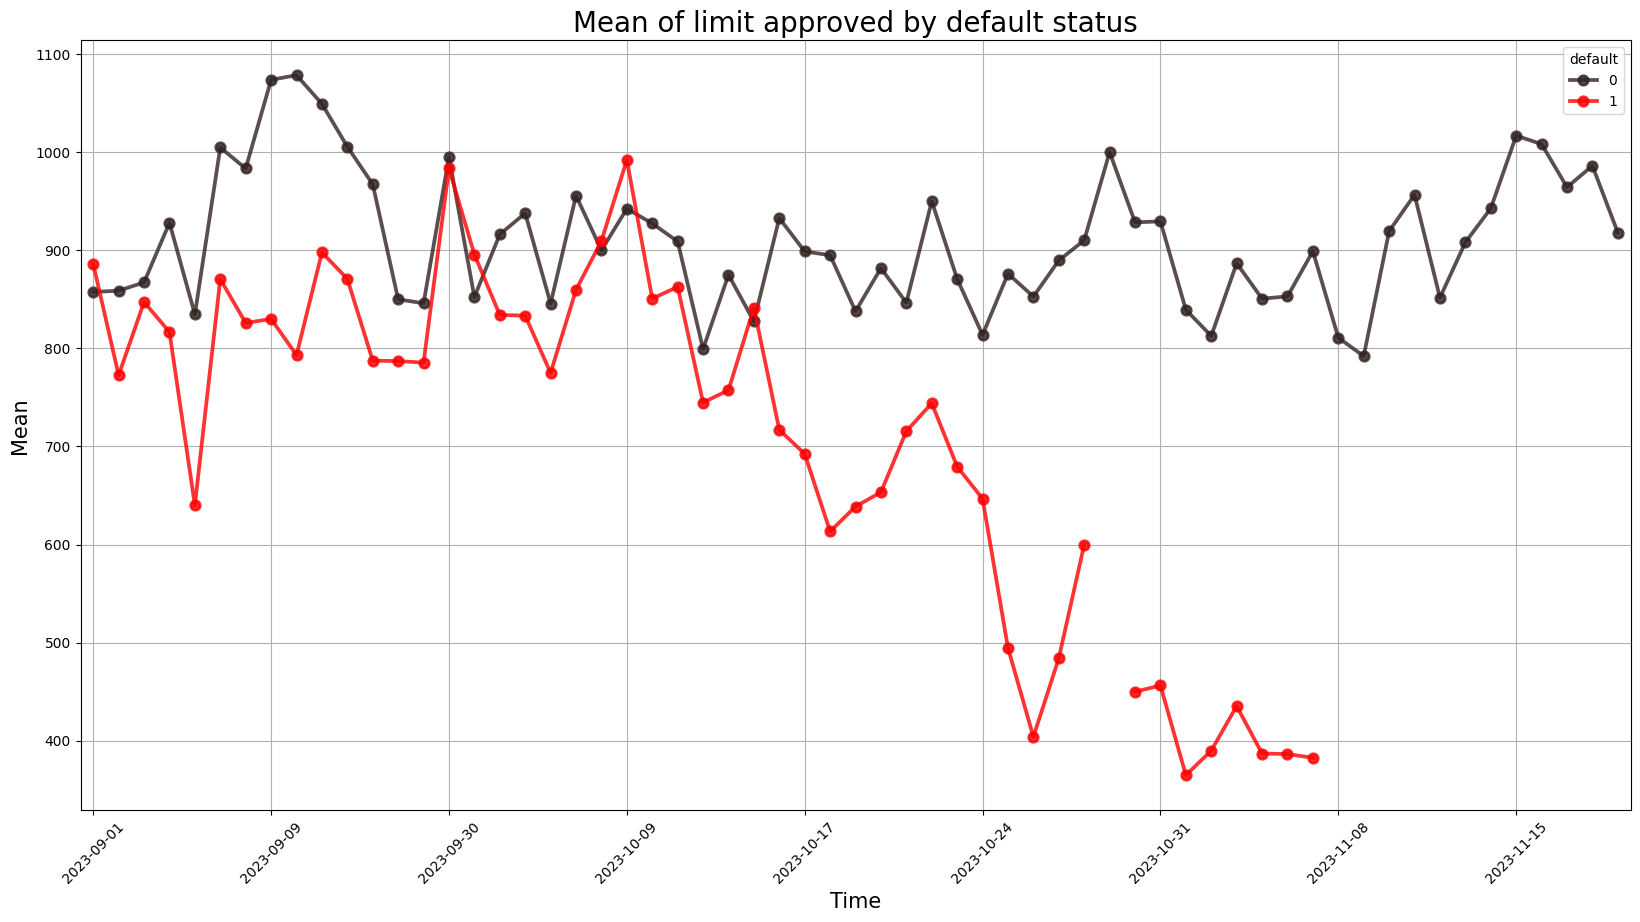

In [53]:
f, ax1 = plt.subplots(figsize=(20, 10))
sns.pointplot(data=pivot_second_task, x=pivot_second_task.index, y=pivot_second_task['mean_limit'], hue=pivot_second_task['default'], palette='dark:Red', alpha=0.8)
plt.xlabel('Time', fontsize=15, color='black')
plt.ylabel('Mean', fontsize=15, color='black')
plt.title('Mean of limit approved by default status', fontsize=20, color='black')
plt.grid()

xtick_labels = ax1.get_xticklabels()

new_xtick_positions = np.arange(0, len(xtick_labels), 7)
new_xtick_labels = [label.get_text() for i, label in enumerate(xtick_labels) if i in new_xtick_positions]

ax1.set_xticks(new_xtick_positions)
ax1.set_xticklabels(new_xtick_labels, rotation=45)

plt.show()

- We can see that the average loan size issued to potential defaulters is decreasing


In [54]:
result = second_full.groupby('default')['Limit Approved '].sum()

total_approved = result[0] + result[1]

res_0 = (result[0] / total_approved) * 100
res_1 = (result[1] / total_approved) * 100

print(f"The percentage ratio between paid and default is:\n"\
      f"total accounts: {total_approved} or {100}%\n"\
      f"paid accounts: {result[0]} or {res_0}%\n"\
      f"default accounts: {result[1]} or {res_1}%")

The percentage ratio between paid and default is:
total accounts: 8535100.0 or 100%
paid accounts: 7150600.0 or 83.7787489308854%
default accounts: 1384500.0 or 16.221251069114597%


In [55]:
pivot_by_variable['Cut Off'].nunique()

4

- We need to calculate the Gini for 4 tershholds

In [56]:
pivot_by_variable

variable_,Cut Off,Limit Approved,Score Final,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V3,V4,V5,V6,V7,V8,V9
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,
230267,0.48,450.0,0.411461,57534.0,NaN,38.0,NaN,31228.0,38.0,52.0,74.0,7.0,3.0,1.0,47.88,1.0,8.0,0.0,1.0,2921.0,0.0,0.0,0.0,0.0,0.0,10.0,-0.012087
232333,0.48,800.0,0.369215,6576.0,NaN,14.0,NaN,13100.0,12.0,8.0,17.0,3.0,2.0,5.0,41.04,5.0,6.0,6.0,6.0,6314.0,4.0,0.0,4.0,6.0,5.0,8.0,-0.012087
240529,0.48,300.0,0.458561,3000.0,NaN,9.0,NaN,14608.0,9.0,14.0,41.0,1.0,0.0,0.0,32.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-0.012087
240869,0.40,800.0,0.369416,7202.0,NaN,8.0,NaN,18357.0,7.0,5.0,8.0,3.0,3.0,1.0,29.05,2.0,3.0,3.0,3.0,18357.0,1.0,0.0,2.0,3.0,2.0,5.0,-0.012087
241148,0.40,1000.0,0.310454,3000.0,NaN,10.0,NaN,0.0,8.0,4.0,7.0,1.0,1.0,3.0,56.57,4.0,5.0,4.0,4.0,375.0,4.0,0.0,4.0,4.0,4.0,5.0,-0.012087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401124,0.40,800.0,0.361549,2927.0,0.0,7.0,NaN,4417.0,6.0,8.0,11.0,3.0,3.0,0.0,54.98,2.0,3.0,3.0,3.0,4441.0,1.0,0.0,3.0,3.0,1.0,5.0,-0.012087
401126,0.52,1000.0,0.343908,8783.0,1.0,44.0,NaN,23132.0,38.0,21.0,34.0,13.0,11.0,10.0,32.31,18.0,38.0,19.0,29.0,29649.0,3.0,2.0,11.0,19.0,12.0,38.0,-0.012087
401140,0.52,800.0,0.400095,3659.0,1.0,7.0,NaN,7455.0,7.0,3.0,8.0,3.0,3.0,0.0,38.53,1.0,3.0,4.0,6.0,7607.0,1.0,0.0,2.0,4.0,1.0,6.0,-0.012087


In [57]:
gini = df.groupby(['client_id'])[['default']].max()
gini[['score','threshold']] = pivot_by_variable[['Score Final ','Cut Off']]

In [58]:
gini.reset_index(inplace=True, drop=True)

In [59]:
def gini_calculation(df):
    gini_values = []
    threshold = []
    for i in sorted(df['threshold'].unique()):
        new_df = df[df['threshold'] == i]
        sorted_df = new_df.sort_values('score')
        
        total_samples = len(sorted_df)
        positive_samples = sorted_df['default'].sum()
        negative_samples = total_samples - positive_samples
        
        p_positive = positive_samples / total_samples
        p_negative = negative_samples / total_samples
        
        gini = 1 - (p_positive ** 2) - (p_negative ** 2)
        gini_values.append(gini)
        threshold.append(i)
        
    return gini_values, threshold

In [60]:
gini_values, threshold = gini_calculation(gini)

In [61]:
for i in range(len(threshold)):
    display(f'threshold = {threshold[i]:<5} | gini impurity = {round(gini_values[i], 3)}')

'threshold = 0.4   | gini impurity = 0.249'

'threshold = 0.48  | gini impurity = 0.449'

'threshold = 0.52  | gini impurity = 0.323'

'threshold = 0.54  | gini impurity = 0.205'

In [62]:
pivot_by_variable[pivot_by_variable['Cut Off'] == 0.54].index

Index([249345, 306535, 313957, 314101, 314165, 314306, 314320, 314321, 314355,
       314357,
       ...
       400635, 400685, 400796, 400882, 400883, 400941, 400969, 401004, 401018,
       401146],
      dtype='int64', name='client_id', length=3519)

In [63]:
best_gini = df[df['client_id'].isin(pivot_by_variable[pivot_by_variable['Cut Off'] == 0.54].index)]
best_gini

,idscore,variable_,varvalue,idscore.1,scoredate,client_id,application_id,agreement_id,stard_day,matured,default
1808,131346,V9,-0.012087,131346,2023-11-10 12:08:44.040,376090,392371,3000392371,2023-11-10,0,0
1809,131346,V19,1.000000,131346,2023-11-10 12:08:44.040,376090,392371,3000392371,2023-11-10,0,0
1810,131346,V20,3.000000,131346,2023-11-10 12:08:44.040,376090,392371,3000392371,2023-11-10,0,0
1811,131346,V18,2.000000,131346,2023-11-10 12:08:44.040,376090,392371,3000392371,2023-11-10,0,0
1812,131346,V17,2.000000,131346,2023-11-10 12:08:44.040,376090,392371,3000392371,2023-11-10,0,0
...,...,...,...,...,...,...,...,...,...,...,...
262712,140937,V2,67.540000,140937,2023-11-17 16:45:44.633,399805,418150,3000418150,2023-11-19,0,0
262713,140937,Score Final,0.437074,140937,2023-11-17 16:45:44.633,399805,418150,3000418150,2023-11-19,0,0
262714,140937,V10,0.000000,140937,2023-11-17 16:45:44.633,399805,418150,3000418150,2023-11-19,0,0
262715,140937,Cut Off,0.540000,140937,2023-11-17 16:45:44.633,399805,418150,3000418150,2023-11-19,0,0


### Task 2 summary 

- There is a trend towards a decrease in the number of defaulting clients
- There is a tendency to reduce the size of the loan for defaulters.
- There is also an unobvious trend towards an increase in the number of clients.
-----------

**The average loan size for defaulters over the last month was just under 400 - 500, which is a very good indicator when compared with 800 - 900 a few months earlier, the approved loan for insurance defaulters has decreased by almost half, and all this despite the fact that there is a trend towards a decrease in defaulters.**

**The latest model has the best gini impurity, but it is recently used and there are no default accounts yet. In a word, we cannot say that our model has become better at predicting defaulters, but we can say with a high probability that we have become better at regulating the credit limit**

### 3) Try using variables to make better scoring , optimizing Default variable

<span style="color:red;">**I don't have a description of the variables to complete this task :(**</span>


### 4) Try to optimize amount default by adjusting credit limit for each bucket of score to have less loss in money 

- First of all, let's divide our clients into groups, according to cut off feature

In [64]:
pivot_by_variable['target'] = df.groupby('client_id')['default'].max()

In [65]:
task_final = pivot_by_variable.drop([col for col in pivot_by_variable.columns if 'V' in col], axis=1)

In [66]:
threshold

[0.4, 0.48, 0.52, 0.54]

In [67]:
task_final_04 = task_final[task_final['Cut Off'] == 0.4].sort_values('Score Final ')
task_final_048 = task_final[task_final['Cut Off'] == 0.48].sort_values('Score Final ')
task_final_052 = task_final[task_final['Cut Off'] == 0.52].sort_values('Score Final ')
task_final_054 = task_final[task_final['Cut Off'] == 0.54].sort_values('Score Final ')

In [68]:
def create_dataset(df, threshold):
    data_dict = {}
    for i in threshold:
        default = df[(df['Cut Off'] == i) & (df['target'] == 1)]['Limit Approved '].sum()
        paid = df[(df['Cut Off'] == i) & (df['target'] == 0)]['Limit Approved '].sum()
        max_lim = df[(df['Cut Off'] == i)]['Limit Approved '].max()
        min_lim = df[(df['Cut Off'] == i)]['Limit Approved '].min()
        max_score = df[(df['Cut Off'] == i)]['Score Final '].max()
        min_score = df[(df['Cut Off'] == i)]['Score Final '].min()
        approved = default + paid
        diff = paid - default
        
        y_true = df[df['Cut Off'] == i]['target']
        y_score = df[df['Cut Off'] == i]['Score Final ']
        roc_auc = roc_auc_score(y_true, y_score)
        
        data_dict[i] = {'total': approved, 'paid_clients': paid, 'default_clients': default, 'diff': diff,\
                        'max_lim' : max_lim, 'min_lim' : min_lim, 'max_score' : max_score, 'min_score' : min_score,\
                        'roc_auc': roc_auc}
    
    dataset = pd.DataFrame.from_dict(data_dict, orient='index')
    
    return dataset

In [69]:
baseline = create_dataset(pivot_by_variable, threshold)

In [70]:
baseline

,total,paid_clients,default_clients,diff,max_lim,min_lim,max_score,min_score,roc_auc
0.40,1072500.0,927200.0,145300.0,781900.0,2000.0,800.0,0.399999,0.122081,0.564437
0.48,1790050.0,1228700.0,561350.0,667350.0,1500.0,300.0,0.479760,0.092863,0.586978
0.52,2810400.0,2330800.0,479600.0,1851200.0,2000.0,300.0,0.519932,0.091191,0.610014
0.54,2862150.0,2663900.0,198250.0,2465650.0,2000.0,300.0,0.539531,0.089403,0.752953


In [71]:
task_final_04

variable_,Cut Off,Limit Approved,Score Final,target
client_id,,,,
326558,0.4,1500.0,0.122081,0
329181,0.4,1500.0,0.122213,0
306869,0.4,1500.0,0.125673,0
293700,0.4,1500.0,0.127054,0
322735,0.4,1500.0,0.129264,0
...,...,...,...,...
299311,0.4,800.0,0.399758,0
331009,0.4,800.0,0.399846,0
351739,0.4,800.0,0.399851,0


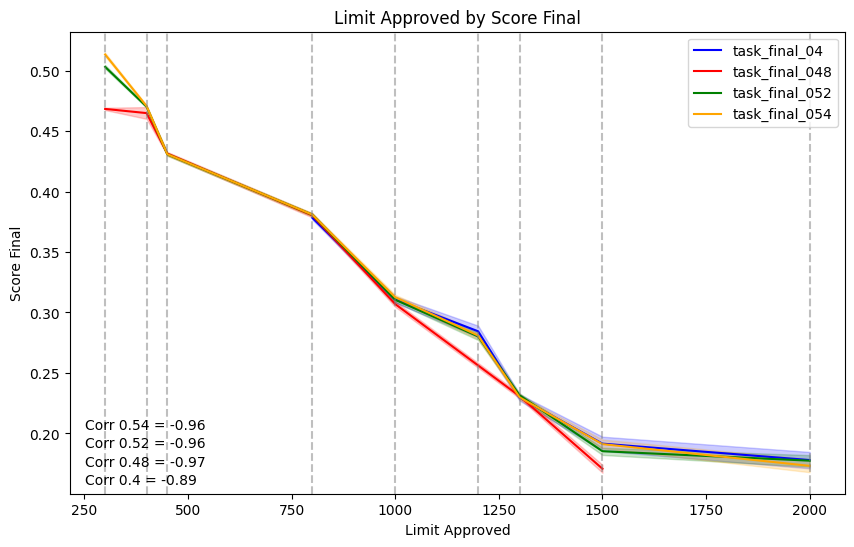

In [72]:
plt.figure(figsize=(10, 6))

plt.xlabel('Limit Approved')
plt.ylabel('Score Final')
plt.title('Limit Approved by Score Final')

sns.lineplot(data=task_final_04, x='Limit Approved ', y='Score Final ', color='blue', label='task_final_04')
sns.lineplot(data=task_final_048, x='Limit Approved ', y='Score Final ', color='red', label='task_final_048')
sns.lineplot(data=task_final_052, x='Limit Approved ', y='Score Final ', color='green', label='task_final_052')
sns.lineplot(data=task_final_054, x='Limit Approved ', y='Score Final ', color='orange', label='task_final_054')


corr_04 = task_final_04['Limit Approved '].corr(task_final_04['Score Final '])
corr_048 = task_final_048['Limit Approved '].corr(task_final_048['Score Final '])
corr_052 = task_final_052['Limit Approved '].corr(task_final_052['Score Final '])
corr_054 = task_final_054['Limit Approved '].corr(task_final_054['Score Final '])

plt.annotate(f'Corr 0.4 = {corr_04:.2f}', xy=(0.02, 0.02), xycoords='axes fraction')
plt.annotate(f'Corr 0.48 = {corr_048:.2f}', xy=(0.02, 0.06), xycoords='axes fraction')
plt.annotate(f'Corr 0.52 = {corr_052:.2f}', xy=(0.02, 0.10), xycoords='axes fraction')
plt.annotate(f'Corr 0.54 = {corr_054:.2f}', xy=(0.02, 0.14), xycoords='axes fraction')

unique_x_values = pivot_by_variable['Limit Approved '].unique()

for x_value in unique_x_values:
    plt.axvline(x=x_value, linestyle='dashed', color='gray', alpha=0.5)

plt.legend()
plt.show()

- For all trash holds we can observe the same dependence; as the final score decreases, the limit approved increases
- It is also worth noting the groups with thrashhold 048 and 04 in the first, the maximum value is less than that of the others, and in the second, the minimum. We can conclude that one group is obviously less trusted, and the other is vice versa
-----
**Our task is to change the limits so that we lose less and earn more**

In [73]:
pivot_by_variable

variable_,Cut Off,Limit Approved,Score Final,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V3,V4,V5,V6,V7,V8,V9,target
client_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230267,0.48,450.0,0.411461,57534.0,NaN,38.0,NaN,31228.0,38.0,52.0,74.0,7.0,3.0,1.0,47.88,1.0,8.0,0.0,1.0,2921.0,0.0,0.0,0.0,0.0,0.0,10.0,-0.012087,0
232333,0.48,800.0,0.369215,6576.0,NaN,14.0,NaN,13100.0,12.0,8.0,17.0,3.0,2.0,5.0,41.04,5.0,6.0,6.0,6.0,6314.0,4.0,0.0,4.0,6.0,5.0,8.0,-0.012087,1
240529,0.48,300.0,0.458561,3000.0,NaN,9.0,NaN,14608.0,9.0,14.0,41.0,1.0,0.0,0.0,32.36,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-0.012087,0
240869,0.40,800.0,0.369416,7202.0,NaN,8.0,NaN,18357.0,7.0,5.0,8.0,3.0,3.0,1.0,29.05,2.0,3.0,3.0,3.0,18357.0,1.0,0.0,2.0,3.0,2.0,5.0,-0.012087,1
241148,0.40,1000.0,0.310454,3000.0,NaN,10.0,NaN,0.0,8.0,4.0,7.0,1.0,1.0,3.0,56.57,4.0,5.0,4.0,4.0,375.0,4.0,0.0,4.0,4.0,4.0,5.0,-0.012087,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401124,0.40,800.0,0.361549,2927.0,0.0,7.0,NaN,4417.0,6.0,8.0,11.0,3.0,3.0,0.0,54.98,2.0,3.0,3.0,3.0,4441.0,1.0,0.0,3.0,3.0,1.0,5.0,-0.012087,0
401126,0.52,1000.0,0.343908,8783.0,1.0,44.0,NaN,23132.0,38.0,21.0,34.0,13.0,11.0,10.0,32.31,18.0,38.0,19.0,29.0,29649.0,3.0,2.0,11.0,19.0,12.0,38.0,-0.012087,0
401140,0.52,800.0,0.400095,3659.0,1.0,7.0,NaN,7455.0,7.0,3.0,8.0,3.0,3.0,0.0,38.53,1.0,3.0,4.0,6.0,7607.0,1.0,0.0,2.0,4.0,1.0,6.0,-0.012087,0


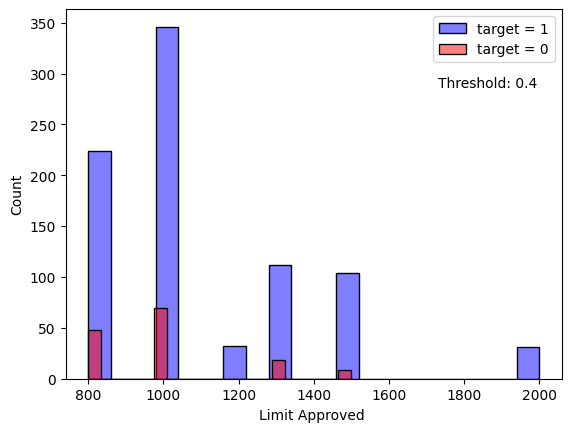

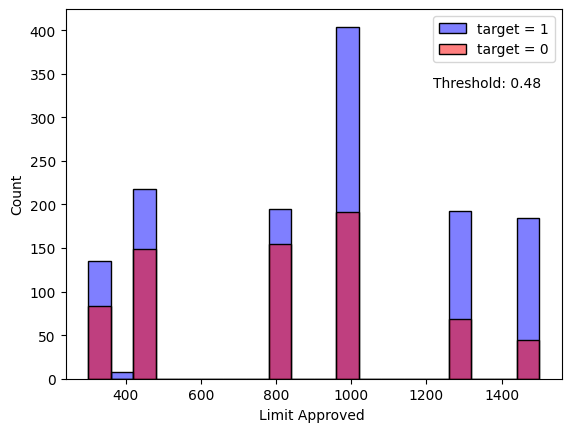

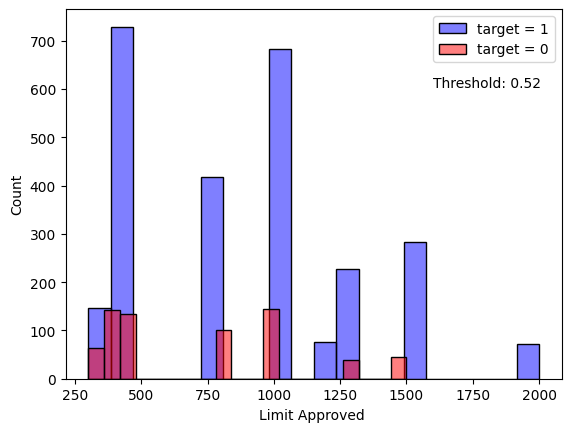

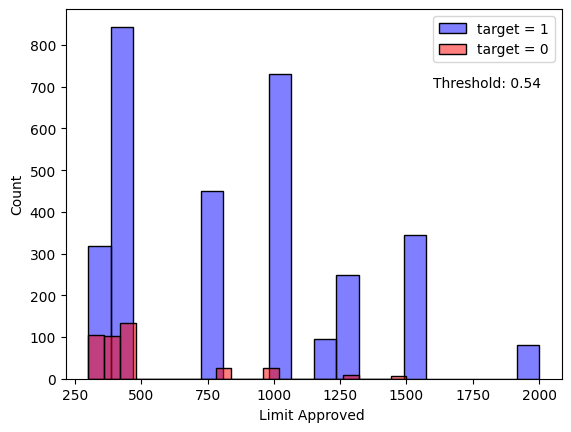

In [74]:
for i in threshold:
    sns.histplot(pivot_by_variable[
        np.logical_and(pivot_by_variable['target'] == 0, pivot_by_variable['Cut Off'] == i)
    ], x='Limit Approved ', bins=20, color='blue', alpha=0.5)
    
    sns.histplot(pivot_by_variable[
        np.logical_and(pivot_by_variable['target'] == 1, pivot_by_variable['Cut Off'] == i)
    ], x='Limit Approved ', bins=20, color='red', alpha=0.5)

    plt.legend(['target = 1', 'target = 0'])
    plt.text(0.85, 0.8, f'Threshold: {i}', ha='center', va='center', transform=plt.gca().transAxes)
    plt.show()

- At first glance, optimizing 3 out of 4 trash holds is not that difficult. The 0.48 threshold looks different

In [75]:
# count clients for evry threshold
pivot_by_variable['Cut Off'].value_counts()

Cut Off
0.54    3519
0.52    3304
0.48    2027
0.40     994
Name: count, dtype: int64

optimization largely depends on the company’s objectives.But if I needed to make some changes, I would do something like this and collect metrics:

------
**threshold 0.4:** for score < 0.3 increase approval limit by 250 (for all limits > 1000)

**threshold 0.48:** for score > 0.3 reduce approval limit by 150 (for all limits <= 1000)

**threshold 0.52:** for score < 0.3 increase approval limit by 200 (for all limits > 1000)

**threshold 0.52:** for score < 0.4 increase approval limit by 200 (for all limits > 500)

In [76]:
task_final_04['new_limits'] = task_final_04['Limit Approved '].apply(lambda x: x + 250 if x > 1000 else x)
task_final_048['new_limits'] = task_final_048['Limit Approved '].apply(lambda x: x - 150 if x <= 1000 else x)
task_final_052['new_limits'] = task_final_052['Limit Approved '].apply(lambda x: x + 200 if x > 1000 else x)
task_final_054['new_limits'] = task_final_054['Limit Approved '].apply(lambda x: x + 200 if x > 500 else x)

In [77]:
baseline

,total,paid_clients,default_clients,diff,max_lim,min_lim,max_score,min_score,roc_auc
0.40,1072500.0,927200.0,145300.0,781900.0,2000.0,800.0,0.399999,0.122081,0.564437
0.48,1790050.0,1228700.0,561350.0,667350.0,1500.0,300.0,0.479760,0.092863,0.586978
0.52,2810400.0,2330800.0,479600.0,1851200.0,2000.0,300.0,0.519932,0.091191,0.610014
0.54,2862150.0,2663900.0,198250.0,2465650.0,2000.0,300.0,0.539531,0.089403,0.752953


In [78]:
task_final_04

variable_,Cut Off,Limit Approved,Score Final,target,new_limits
client_id,,,,,
326558,0.4,1500.0,0.122081,0,1750.0
329181,0.4,1500.0,0.122213,0,1750.0
306869,0.4,1500.0,0.125673,0,1750.0
293700,0.4,1500.0,0.127054,0,1750.0
322735,0.4,1500.0,0.129264,0,1750.0
...,...,...,...,...,...
299311,0.4,800.0,0.399758,0,800.0
331009,0.4,800.0,0.399846,0,800.0
351739,0.4,800.0,0.399851,0,800.0


In [79]:
concat_new  = pd.concat([task_final_04, task_final_048, task_final_052, task_final_054], axis=0)

In [80]:
new_limits_stat = pd.DataFrame()

In [81]:
mask_1 = concat_new['target'] == 1
mask_0 = concat_new['target'] == 0

In [82]:
new_limits_stat['total'] = concat_new.groupby(['Cut Off'])['new_limits'].sum()
new_limits_stat['paid_clients'] = concat_new[mask_0].groupby(['Cut Off'])['new_limits'].sum()
new_limits_stat['default_clients'] = concat_new[mask_1].groupby(['Cut Off'])['new_limits'].sum()
new_limits_stat['diff'] = new_limits_stat['paid_clients'] - new_limits_stat['default_clients']

In [83]:
baseline_t = baseline.iloc[:,:4]
baseline_t = baseline_t.T
new_limits_stat = new_limits_stat.T

In [84]:
new_limits_stat['full'] = new_limits_stat.sum(axis=1)
baseline_t['full'] = baseline_t.sum(axis=1)

In [85]:
print('Before adding new limits:')
display(((baseline_t['full'].iloc[1:3] / baseline_t['full'].iloc[0])* 100).round(2))
print('After adding new limits:')
display(((new_limits_stat['full'].iloc[1:3] / new_limits_stat['full'].iloc[0])* 100).round(2))

Before adding new limits:


paid_clients       83.78
default_clients    16.22
Name: full, dtype: float64

After adding new limits:


paid_clients       85.06
default_clients    14.94
Name: full, dtype: float64

- the first change we made, we were able to improve profitability by more than 1 percent

## Result

- Statistics between classes are very different, which means that we can determine what a certain proportion of defaulters
- There is reason to say that we have positive dynamics in the model’s work. Provided that all clients are from the same distribution.
- With small changes we were able to increase the company's income by changing the approval limit for certain scores

<style>
.fancy-font {
  font-family: "Comic Sans MS", cursive, sans-serif;
  font-size: 25px;
  color: pink;
}
</style>

<p class="fancy-font">Thank you.</p>

![Пример картинки](https://i.pinimg.com/564x/21/9f/b0/219fb0b4d97105d627fc66d1f0de2b26.jpg)
